In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

Requisitos que deben cumplir las gráficas (en caso de usar alguna de ellas):

Todas deben llevar título.

Los nombres de los ejes deben estar en castellano.

En los scatterplot los puntos deben tener un tamaño de 2.

En los scatterplot los puntos deben tener un color diferente al azul.

En los barplot las barras siempre tienen que estar ordenadas de mayor a menor.

En los barplot y countplot las barras tienen que tener un color diferente a los que vienen por defecto.

En los pieplot siempre tenemos que añadir la etiqueta de a que % corresponde cada quesito.

In [4]:
df = pd.read_csv("world_data_full_apply_nulos.csv", index_col=0)
pd.set_option('display.max_columns', None)
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa



¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

In [13]:
df_paises_continente = df.groupby("continent")["country"].count().reset_index()
df_paises_continente 

,continent,country
0,Africa,53
1,Asia,45
2,Central America,20
3,Europe,47
4,North America,2
5,Oceania,14
6,South America,13


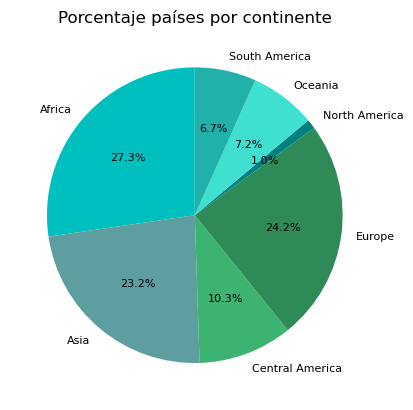

In [16]:
colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]


# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie("country", labels= "continent",
        data = df_paises_continente, 
        autopct= '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);

plt.title("Porcentaje países por continente");


¿Cuáles son los 10 países con la mayor área forestal?

In [34]:
df_forested = df.groupby("country")["forested_area"].sum()
df_forested = df_forested.sort_values(ascending=False)

df_10_forested = df_forested.head(10)

df_10_forested = df_10_forested.reset_index()

df_10_forested

,country,forested_area
0,Suriname,98.3
1,Federated States of Micronesia,91.9
2,Gabon,90.0
3,Seychelles,88.4
4,Palau,87.6
5,Guyana,83.9
6,Laos,82.1
7,Solomon Islands,77.9
8,Papua New Guinea,74.1
9,Finland,73.1


C:\Users\PC\AppData\Local\Temp\ipykernel_3392\3112715784.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "forested_area",


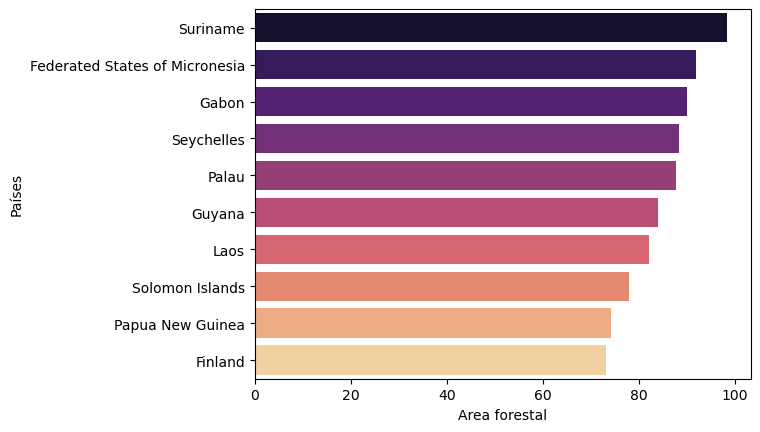

In [36]:
sns.barplot(x = "forested_area", 
            y = "country", 
            data = df_10_forested, 
            palette = "magma")

plt.xlabel("Area forestal")
plt.ylabel("Países");


¿Cómo se distribuye la densidad de población entre los países?

C:\Users\PC\AppData\Local\Temp\ipykernel_3392\1155199167.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


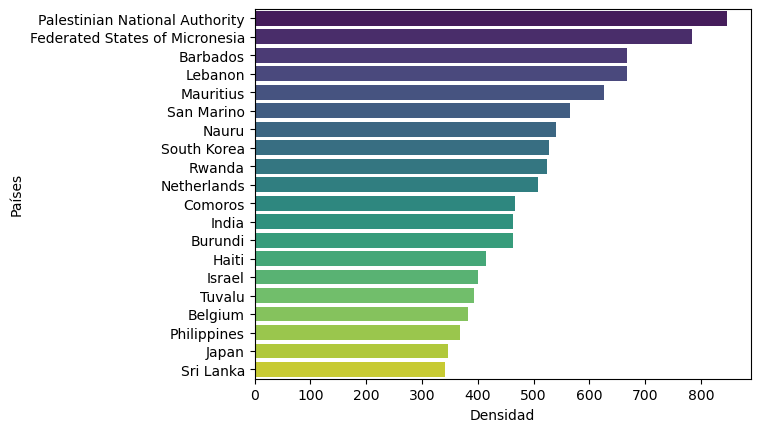

In [52]:
top_densidad = df.sort_values("density", ascending=False).head(20)
sns.barplot(
    y="country", 
    x="density", 
    data=top_densidad, 
    palette="viridis"
)

plt.xlabel("Densidad")
plt.ylabel("Países");


¿Existe una relación entre el PIB y la tasa de desempleo de los países?

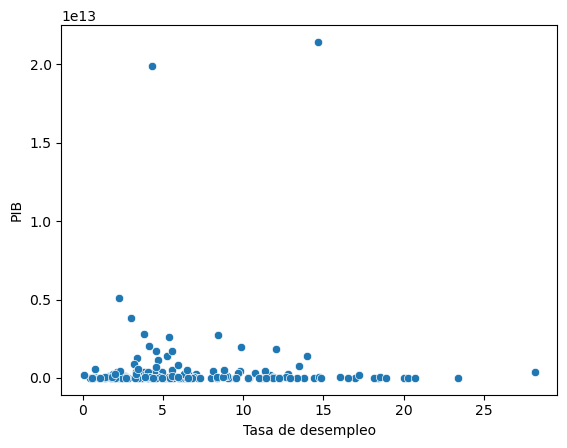

In [54]:
sns.scatterplot(x = "unemployment_rate", 
                y = "gdp", 
                data = df)

# cambiamos los nombres de los ejes
plt.xlabel("Tasa de desempleo")
plt.ylabel("PIB");

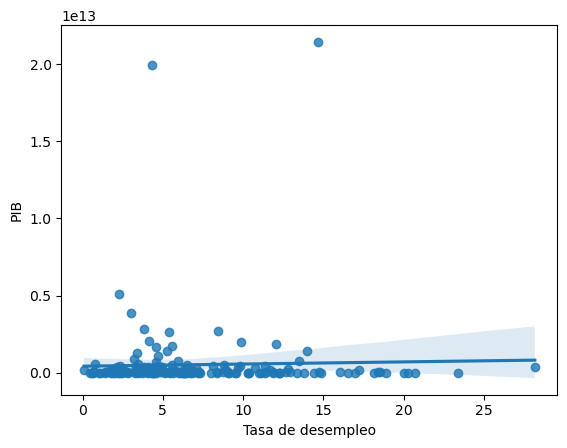

In [55]:
sns.regplot(x = "unemployment_rate", 
                y = "gdp", 
                data = df)

# cambiamos los nombres de los ejes
plt.xlabel("Tasa de desempleo")
plt.ylabel("PIB");


¿Cómo se relacionan la tasa de mortalidad infantil y la esperanza de vida?

Text(0, 0.5, 'esperanza de vida')

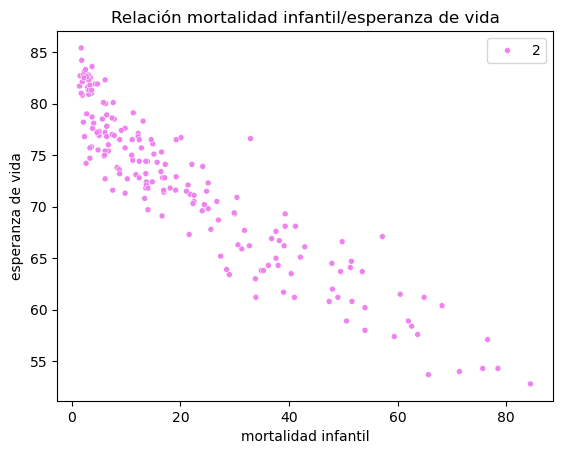

In [57]:
sns.scatterplot(data=df, x='infant_mortality', y='life_expectancy', size=2, color='violet')
plt.title('Relación mortalidad infantil/esperanza de vida')
plt.xlabel('mortalidad infantil')
plt.ylabel('esperanza de vida')